In [57]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
class layer:
    def __init__(self, in_size, out_size):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size], mean=0.0, stddev=0.01))
#         self.b = tf.Variable(tf.zeros([1,out_size]))
#         self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
        self.b = tf.Variable(tf.random_normal([1, out_size], mean=0.0, stddev=0.01))
    
        
    def output(self, inputs, activation_function=None):
        if activation_function == None:
            return tf.matmul(inputs, self.W) + self.b
        else :
            return activation_function(tf.matmul(inputs, self.W) + self.b)

In [59]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
batch_size = 512
g_dim = 256

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [65]:
x_d = tf.placeholder(tf.float32, shape=[None, 784])
x_g = tf.placeholder(tf.float32, shape=[None, g_dim])

In [66]:
d_l1 = layer(784, g_dim)
d_l2 = layer(g_dim, 1)

g_l1 = layer(g_dim, 512)
g_l2 = layer(512, 784)

var_d = [d_l1.W, d_l1.b, d_l2.W, d_l2.b]
var_g = [g_l1.W, g_l1.b, g_l2.W, g_l2.b]

In [67]:
def discriminator(x):
    h_d1 = d_l1.output(x, tf.nn.relu)
    h_d2 = d_l2.output(h_d1, tf.nn.sigmoid)
    return h_d2

def generator(x):
    h_g1 = g_l1.output(x, tf.nn.relu)
    h_g2 = g_l2.output(h_g1, tf.nn.sigmoid)
    return h_g2

def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

g_sample = generator(x_g)
d_real = discriminator(x_d)
d_fake = discriminator(g_sample)

d_loss = -tf.reduce_mean(tf.log(d_real)+tf.log(1-d_fake))    # d_real, 1-d_fake bigger -> better
g_loss = -tf.reduce_mean(tf.log(d_fake))    # d_fake bigger -> better


In [82]:
d_optimizer = tf.train.AdamOptimizer(0.0001).minimize(d_loss, var_list = var_d)
# d_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(d_loss, var_list = var_d)

g_optimizer = tf.train.AdamOptimizer(0.00005).minimize(g_loss, var_list = var_g)
# g_optimizer = tf.train.MomentumOptimizer(0.01,0.01).minimize(g_loss, var_list = var_g)


step: 0  d-loss: 1.36457  g-loss: 0.716562
step: 1000  d-loss: 0.423984  g-loss: 2.02989
step: 2000  d-loss: 0.191151  g-loss: 2.46715
step: 3000  d-loss: 0.296511  g-loss: 1.73522
step: 4000  d-loss: 0.276141  g-loss: 2.11344
step: 5000  d-loss: 0.166429  g-loss: 2.77713
step: 6000  d-loss: 0.211088  g-loss: 2.81823
step: 7000  d-loss: 0.221413  g-loss: 2.83501
step: 8000  d-loss: 0.214034  g-loss: 2.73274
step: 9000  d-loss: 0.203322  g-loss: 3.01631
step: 10000  d-loss: 0.168879  g-loss: 3.09028
step: 11000  d-loss: 0.163629  g-loss: 3.3411
step: 12000  d-loss: 0.106384  g-loss: 3.4789
step: 13000  d-loss: 0.0876393  g-loss: 4.20544
step: 14000  d-loss: 0.141476  g-loss: 3.55997
step: 15000  d-loss: 0.174426  g-loss: 3.52015
step: 16000  d-loss: 0.0696942  g-loss: 4.2574
step: 17000  d-loss: 0.214901  g-loss: 2.89043
step: 18000  d-loss: 0.154516  g-loss: 3.6134
step: 19000  d-loss: 0.14609  g-loss: 3.44338
step: 20000  d-loss: 0.105268  g-loss: 4.06607


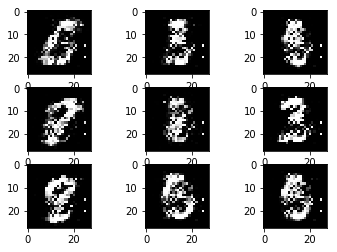

In [83]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(20001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train

zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')


In [84]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1. and g_loss_train<1. :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: 0.0979801  g-loss: 4.05515
step: 1000  d-loss: 0.253812  g-loss: 3.1519
step: 2000  d-loss: 0.0978541  g-loss: 4.16266
step: 3000  d-loss: 0.163838  g-loss: 3.737
step: 4000  d-loss: 0.1641  g-loss: 3.92323
step: 5000  d-loss: 0.155789  g-loss: 3.82971
step: 6000  d-loss: 0.176131  g-loss: 3.68119
step: 7000  d-loss: 0.392672  g-loss: 2.71527
step: 8000  d-loss: 0.107805  g-loss: 4.27958
step: 9000  d-loss: 0.188013  g-loss: 3.88611
step: 10000  d-loss: 0.151076  g-loss: 3.97532
step: 11000  d-loss: 0.067372  g-loss: 4.94488
step: 12000  d-loss: 0.179406  g-loss: 4.20443
step: 13000  d-loss: 0.0810326  g-loss: 4.9801
step: 14000  d-loss: 0.104045  g-loss: 4.22951
step: 15000  d-loss: 0.159695  g-loss: 4.03291
step: 16000  d-loss: 0.119563  g-loss: 4.43204
step: 17000  d-loss: 0.0843017  g-loss: 4.66491
step: 18000  d-loss: 0.180044  g-loss: 3.97319
step: 19000  d-loss: 0.128668  g-loss: 4.3249
step: 20000  d-loss: 0.153983  g-loss: 4.52136
step: 21000  d-loss: 0.143626

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

In [85]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1. and g_loss_train<1. :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: nan  g-loss: nan
step: 1000  d-loss: nan  g-loss: nan
step: 2000  d-loss: nan  g-loss: nan
step: 3000  d-loss: nan  g-loss: nan
step: 4000  d-loss: nan  g-loss: nan
step: 5000  d-loss: nan  g-loss: nan
step: 6000  d-loss: nan  g-loss: nan
step: 7000  d-loss: nan  g-loss: nan
step: 8000  d-loss: nan  g-loss: nan
step: 9000  d-loss: nan  g-loss: nan
step: 10000  d-loss: nan  g-loss: nan
step: 11000  d-loss: nan  g-loss: nan
step: 12000  d-loss: nan  g-loss: nan
step: 13000  d-loss: nan  g-loss: nan
step: 14000  d-loss: nan  g-loss: nan
step: 15000  d-loss: nan  g-loss: nan
step: 16000  d-loss: nan  g-loss: nan
step: 17000  d-loss: nan  g-loss: nan
step: 18000  d-loss: nan  g-loss: nan
step: 19000  d-loss: nan  g-loss: nan
step: 20000  d-loss: nan  g-loss: nan
step: 21000  d-loss: nan  g-loss: nan
step: 22000  d-loss: nan  g-loss: nan
step: 23000  d-loss: nan  g-loss: nan
step: 24000  d-loss: nan  g-loss: nan
step: 25000  d-loss: nan  g-loss: nan
step: 26000  d-loss: nan 

KeyboardInterrupt: 

In [ ]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
#         if d_loss_train<1.5 and g_loss_train<1.5 :
#             break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

In [55]:
for step in range(50001):
    batch_x = mnist.train.next_batch(batch_size)[0]
#     _, d_loss_train = sess.run([d_optimizer, d_loss], feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
    sess.run(d_optimizer, feed_dict={x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
#     _, g_loss_train = sess.run([g_optimizer, g_loss], feed_dict={x_g: sample_Z(batch_size, g_dim)})
    sess.run(g_optimizer, feed_dict={x_g: sample_Z(batch_size, g_dim)})
    if step%1000==0:
        d_loss_train, g_loss_train = sess.run([d_loss, g_loss], feed_dict=
                            {x_d: batch_x, x_g: sample_Z(batch_size, g_dim)})
        print 'step:', step, ' d-loss:', d_loss_train, ' g-loss:', g_loss_train
        if d_loss_train<1.5 and g_loss_train<1.5 :
            break

# zz = sample_Z(batch_size, g_dim)
gg = sess.run(g_sample, feed_dict = {x_g: zz})
# gg = sess.run(g_sample, feed_dict = {x_g: sample_Z(batch_size, g_dim)})
gg_pic = np.array([np.reshape(m,(28,28)) for m in gg])
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[i*3+j], cmap='gray')

step: 0  d-loss: nan  g-loss: nan
step: 1000  d-loss: nan  g-loss: nan
step: 2000  d-loss: nan  g-loss: nan
step: 3000  d-loss: nan  g-loss: nan
step: 4000  d-loss: nan  g-loss: nan
step: 5000  d-loss: nan  g-loss: nan
step: 6000  d-loss: nan  g-loss: nan
step: 7000  d-loss: nan  g-loss: nan
step: 8000  d-loss: nan  g-loss: nan
step: 9000  d-loss: nan  g-loss: nan
step: 10000  d-loss: nan  g-loss: nan
step: 11000  d-loss: nan  g-loss: nan
step: 12000  d-loss: nan  g-loss: nan
step: 13000  d-loss: nan  g-loss: nan
step: 14000  d-loss: nan  g-loss: nan
step: 15000  d-loss: nan  g-loss: nan
step: 16000  d-loss: nan  g-loss: nan
step: 17000  d-loss: nan  g-loss: nan
step: 18000  d-loss: nan  g-loss: nan
step: 19000  d-loss: nan  g-loss: nan
step: 20000  d-loss: nan  g-loss: nan
step: 21000  d-loss: nan  g-loss: nan
step: 22000  d-loss: nan  g-loss: nan
step: 23000  d-loss: nan  g-loss: nan
step: 24000  d-loss: nan  g-loss: nan
step: 25000  d-loss: nan  g-loss: nan
step: 26000  d-loss: nan 

AttributeError: 'MaskedConstant' object has no attribute '_fill_value'

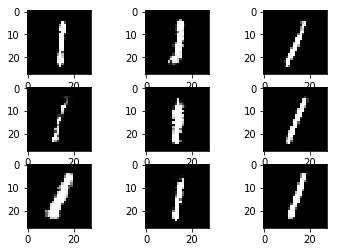

In [76]:
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(gg_pic[335+i*3+j], cmap='gray')